In [1]:
import pandas as pd
import numpy as np
import networkx as nx

In [2]:
comments_df = pd.read_csv("./data/태풍링링_comment_info.csv")
location_df = pd.read_csv("./data/태풍링링_location.csv")
post_df = pd.read_csv("./data/태풍링링_post_info.csv")

In [3]:
comments_df = pd.read_csv("./data/태풍링링_comment_info.csv")
keywords = ["경로", "피해", "태풍", "링링", "타파", "바람", "비바람", "속도"]
contains_df = comments_df[comments_df.comment_hashtag.apply(lambda x : any([(w in x) for w in keywords]))]
hashtags = contains_df.comment_hashtag.apply(lambda x : x[1:-1].split(", ")).apply(lambda x : [w[2:-1] for w in x])
hashtags

0                   [태풍, 태풍솔릭, 짱구, 짱구는못말려, 웃긴영상, 일상, 태풍조심]
1                                               [태풍링링, 링링]
51       [보쌈, 야식, 야식추천, 배달의민족, 혼맥, 댕댕이육아, 강아지옷, 가을장마, 태...
55       [손목보호대, 터널증후군, 손목마사지, 허리타투, 허리디스크, 도수치료, 물리치료,...
76       [일상스타그램, 일상, 넷플릭스, 밖으로, 비온다, ㅠㅠ, 좋아요그램, 좋반, 좋아...
                               ...                        
93885                         [태풍피해, 태풍미탁, 태풍링링, 태풍타파, 태풍]
93897    [기분전환, 스타벅스, 새댁밥상, 일기장그램, 맑은하늘, 날씨굿, 나들이, 계절, ...
93900                           [태풍, 태풍링링, 조용한, 평화로운, 개천절]
93911    [대구, 현대백화점, 쇼핑, 쇼핑은언제나옳다, 다니엘웰링턴, 파인드카푸어, 태풍, ...
93983    [청자켓, 여자쇼핑몰, 홍대옷가게, 개강룩, 대학생코디, 직장인스타그램, 패션스타그...
Name: comment_hashtag, Length: 2340, dtype: object

In [4]:
from collections import Counter
word_counts = Counter(np.asarray([word for li in hashtags.values for word in li]))
count_series = pd.Series(word_counts)
unique_words = count_series[count_series > 5].index.values

In [5]:
word2idx = {}
for i, word in enumerate(unique_words):
    word2idx[word] = i
    
idx2word = {v: k for k, v in word2idx.items()}
word_size = len(word2idx)
word_size

676

In [6]:
from itertools import combinations
co_matrix = np.zeros((word_size,word_size))
for h in hashtags:
    for wi, wj in combinations(h, 2):
        if wi in unique_words and wj in unique_words:
            i, j = word2idx[wi], word2idx[wj]
            co_matrix[i, j] += 1
co_matrix

array([[  4.,  98.,  30., ...,   6.,   6.,   5.],
       [134.,   2.,   8., ...,   8.,   6.,   0.],
       [  6.,   6.,   0., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   6.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  3.,   0.,   1., ...,   0.,   0.,   0.]])

In [7]:
hashtag_network = nx.from_numpy_matrix(co_matrix)

/home/johnny/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


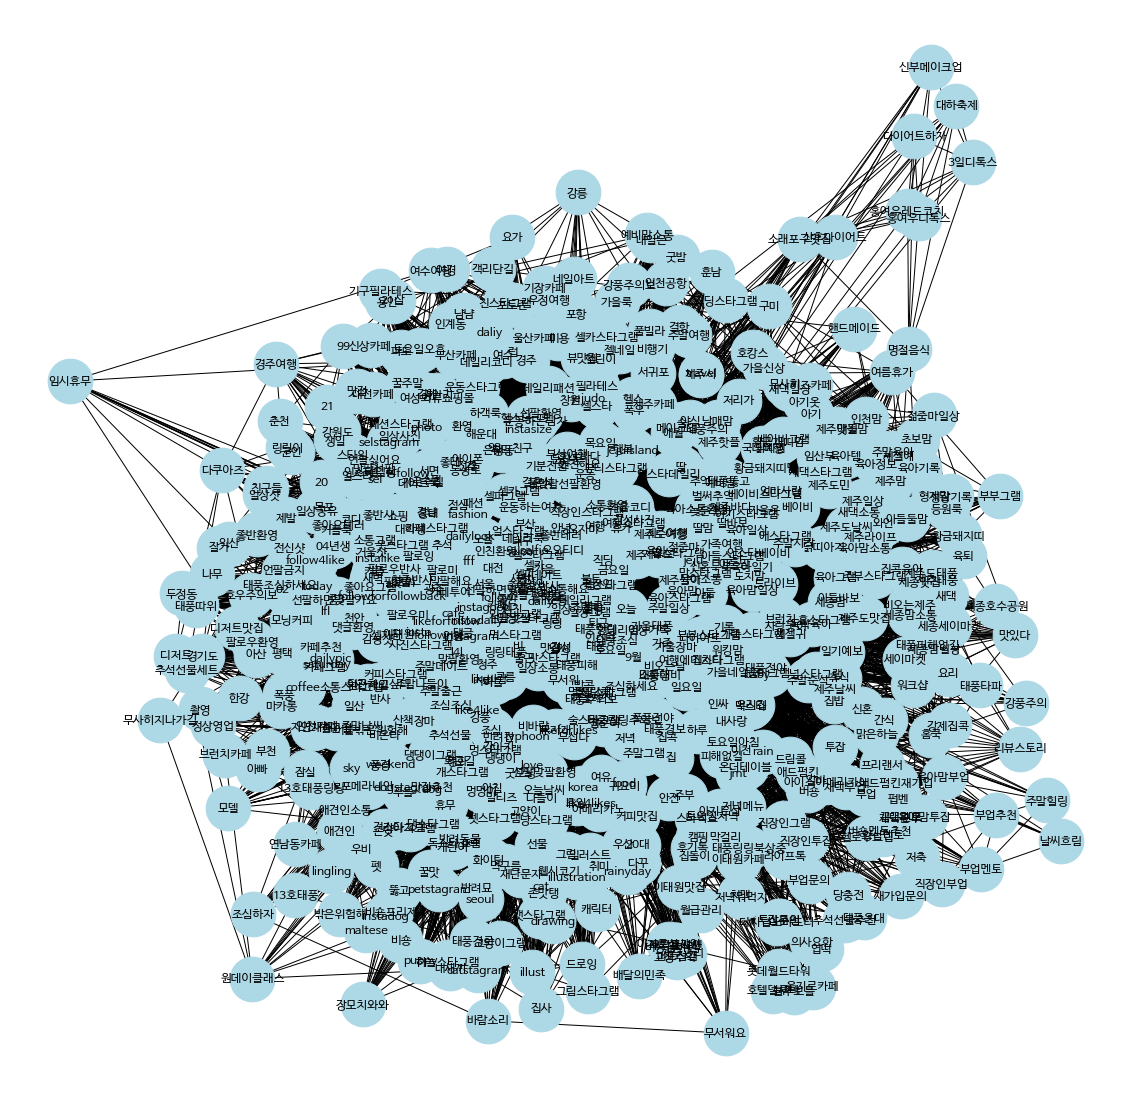

In [8]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import rc
%matplotlib inline
font = 'NanumBarunGothic'
fig = plt.figure()
fig.set_size_inches(20, 20)
ax = fig.add_subplot(1, 1, 1)
ax.axis("off")
option = {
    'node_color' : 'lightblue',
    'node_size' : 2000,
    'size' : 2
}
nx.draw(hashtag_network, labels=idx2word, font_family=font, ax=ax, **option)